# Importing Python libraries and functions

In [1]:
import time
start_time = time.time()
import progressbar
import os
import numpy as np
from keras.preprocessing import image
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy import stats
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [2]:
cwd = os.getcwd()

print(cwd)

C:\Users\User\Desktop\4th_year_AMLS\AMLS_19-20_ChinYangTan_16053203\Project_AMLS_19-20_16053203\A2


# Data Preprocessing

In [3]:
import landmarks_v2 as l2

In [4]:
def get_data():
    return l2.extract_features_labels()
    
def split_data(X, Y):

    X, Y = shuffle(X,Y)
    tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, train_size=0.7)
    
    return tr_X, tr_Y, te_X, te_Y

In [5]:
X,y = get_data()

print(X.shape)
print(y.shape)

(4798, 68, 2)
(4798,)


In [6]:
print (os.path.abspath(os.curdir))

C:\Users\User\Desktop\4th_year_AMLS\AMLS_19-20_ChinYangTan_16053203\Project_AMLS_19-20_16053203\A2


In [7]:
Y = np.array([y, -(y - 1)]).T 

tr_X, tr_Y, te_X, te_Y = split_data(X, Y)

In [8]:
print(tr_X)
print(tr_X.shape)
print(tr_Y)
print(tr_Y.shape)

[[[ 47 105]
  [ 48 118]
  [ 51 130]
  ...
  [ 92 154]
  [ 89 155]
  [ 85 154]]

 [[ 47 109]
  [ 48 121]
  [ 49 132]
  ...
  [ 92 155]
  [ 89 156]
  [ 85 155]]

 [[ 48 109]
  [ 48 121]
  [ 49 132]
  ...
  [ 93 155]
  [ 88 156]
  [ 82 155]]

 ...

 [[ 51 112]
  [ 51 123]
  [ 52 133]
  ...
  [ 91 159]
  [ 87 159]
  [ 82 158]]

 [[ 41 107]
  [ 42 119]
  [ 42 132]
  ...
  [ 93 157]
  [ 88 158]
  [ 82 157]]

 [[ 56 116]
  [ 55 125]
  [ 54 135]
  ...
  [ 88 161]
  [ 82 161]
  [ 77 159]]]
(3358, 68, 2)
[[ 0.  1.]
 [ 0.  1.]
 [ 1. -0.]
 ...
 [ 1. -0.]
 [ 1. -0.]
 [ 1. -0.]]
(3358, 2)


In [9]:
def reshapeX(X):
    return X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

def reshapeY(y):
    return list(zip(*y))[0]

tr_X = reshapeX(tr_X)
te_X = reshapeX(te_X)
tr_Y = reshapeY(tr_Y)
te_Y = reshapeY(te_Y)

In [10]:
print(tr_X.shape)

(3358, 136)


# Implementing SVM

In [11]:
gamma='scale'

for C in [0.1,1]:
    for degree in [1, 2, 3, 4]:
                
        lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
        print(C, "Linear:", lin_svc.score(te_X, te_Y))

        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
        print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
        print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

0.1 Linear: 0.8909722222222223
0.1 scale Rbf: 0.8652777777777778
0.1 1 Poly 0.8104166666666667
0.1 Linear: 0.8909722222222223
0.1 scale Rbf: 0.8652777777777778
0.1 2 Poly 0.8784722222222222
0.1 Linear: 0.8909722222222223
0.1 scale Rbf: 0.8652777777777778
0.1 3 Poly 0.8895833333333333
0.1 Linear: 0.8909722222222223
0.1 scale Rbf: 0.8652777777777778
0.1 4 Poly 0.8902777777777777
1 Linear: 0.8868055555555555
1 scale Rbf: 0.8805555555555555
1 1 Poly 0.8763888888888889
1 Linear: 0.8868055555555555
1 scale Rbf: 0.8805555555555555
1 2 Poly 0.8909722222222223
1 Linear: 0.8868055555555555
1 scale Rbf: 0.8805555555555555
1 3 Poly 0.8881944444444444
1 Linear: 0.8868055555555555
1 scale Rbf: 0.8805555555555555
1 4 Poly 0.8930555555555556


# Parameter Optimisation

In [12]:
from sklearn.svm import SVC as svc

In [13]:
lin = {'C': stats.uniform(0.1, 10), 'kernel': ['linear']}

rbf = {'C': stats.uniform(0.1, 10), 'gamma': stats.uniform(0.0001, 0.01), 'kernel': ['rbf']}

poly = {'C': stats.uniform(0.1, 10), 'degree': stats.uniform(1, 4), 'kernel': ['poly']}

def randomSearch(X, y, param_kernel):
    param_distributions = param_kernel 
    searchrand = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, n_jobs=-1, refit=True, verbose=3)
    searchrand.fit(X, y)
#   printing statistical scores 
    searchrand.cv_results_
    
    print(searchrand.cv_results_)
    return searchrand.best_params_, searchrand.best_estimator_  

# Obtaining optimum hyperparameters and classifier for different kernel
linSVC_param, lin_SVC = randomSearch(tr_X, tr_Y, lin)
rbfSVC_param, rbf_SVC = randomSearch(tr_X, tr_Y, rbf)
polySVC_param, poly_SVC = randomSearch(tr_X, tr_Y, poly)
#print(datetime.now() - start)

# Display optimum hyperparameters for SVC kernel
print('Optimum hyperparameters for linear kernel: ')
print(linSVC_param)
print('Optimum hyperparameters for rbf kernel: ')
print(rbfSVC_param)
print('Optimum hyperparameters for polynomial kernel: ')
print(polySVC_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 47.0min finished


{'mean_fit_time': array([ 351.44647388,  206.0003828 ,  690.75820804, 1036.83290367,
         90.21666884,  808.32014298,  321.46693296,  458.33586206,
        282.11007071,   98.29896011]), 'std_fit_time': array([ 36.64526776,  91.49926924, 217.91190916, 196.38110007,
         9.77324004, 147.79982322, 160.0840733 ,  97.29637195,
        46.33340785,  18.09459652]), 'mean_score_time': array([0.25666065, 0.22300406, 0.57865281, 0.30538387, 0.55170317,
       0.32812295, 0.16695294, 0.10910869, 0.11768508, 0.13763199]), 'std_score_time': array([0.17286735, 0.13805023, 0.34113055, 0.18698692, 0.20000488,
       0.1832878 , 0.09089375, 0.015368  , 0.01976637, 0.05316115]), 'param_C': masked_array(data=[4.285823049361129, 3.377155740127097,
                   6.4994240869192295, 9.124871701447493,
                   0.4767948728604686, 6.454250371240425,
                   3.278506199744801, 6.876125409838798,
                   5.687266989677399, 2.232553773348025],
             mask=[Fal

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.5s finished


{'mean_fit_time': array([6.38472815, 7.73910599, 2.457231  , 6.00514336, 7.08206306,
       7.68804331, 7.39941511, 7.37308526, 7.40619678, 6.49423504]), 'std_fit_time': array([0.23915574, 1.03950329, 0.35213109, 0.61791375, 0.95152648,
       0.89624901, 1.04670107, 0.95551288, 0.94357913, 0.31930449]), 'mean_score_time': array([1.09507174, 1.18323717, 0.1773252 , 0.54434466, 0.91954126,
       1.0021203 , 1.29493732, 1.18642812, 1.00551128, 0.78690166]), 'std_score_time': array([0.31021361, 0.20758077, 0.02738964, 0.14967466, 0.18438427,
       0.09020118, 0.1887026 , 0.24017344, 0.09672467, 0.31754403]), 'param_C': masked_array(data=[7.3430456975845715, 4.934878595363888,
                   5.194665732234254, 8.732667755637726,
                   9.780994213018486, 6.167195489589498,
                   0.2542689153703269, 5.534598704926228,
                   4.853316874520383, 4.558632055687752],
             mask=[False, False, False, False, False, False, False, False,
           

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.6s finished


{'mean_fit_time': array([2.95789104, 7.11058745, 1.94021239, 2.50749598, 3.02291698,
       2.61002164, 3.30735645, 3.69811287, 3.51320758, 2.07884226]), 'std_fit_time': array([0.46055437, 0.9962859 , 0.28216057, 0.32265603, 0.44532465,
       0.33062118, 0.46896258, 0.2562009 , 0.45214627, 0.46755775]), 'mean_score_time': array([0.20864205, 0.14042506, 0.27965221, 0.37679257, 0.33191338,
       0.19228539, 0.15159602, 0.5265914 , 0.26189957, 0.18829632]), 'std_score_time': array([0.08496112, 0.03048219, 0.08787087, 0.05835954, 0.14409009,
       0.04125371, 0.04201607, 0.16408395, 0.03708234, 0.06311376]), 'param_C': masked_array(data=[0.829920735628774, 3.759803077257716, 6.34025563759329,
                   5.185516151892778, 7.9705880930022195,
                   4.5292875911477175, 9.282670109121037,
                   1.5386871215164466, 5.704931089686103,
                   8.731785185643352],
             mask=[False, False, False, False, False, False, False, False,
           

In [14]:
# printing validation accuracy scores for each kernel
print(lin_SVC.score(te_X, te_Y))
print(rbf_SVC.score(te_X, te_Y))
print(poly_SVC.score(te_X, te_Y))

0.8847222222222222
0.9013888888888889
0.8861111111111111


# Cross-validation

Automatically created module for IPython interactive environment


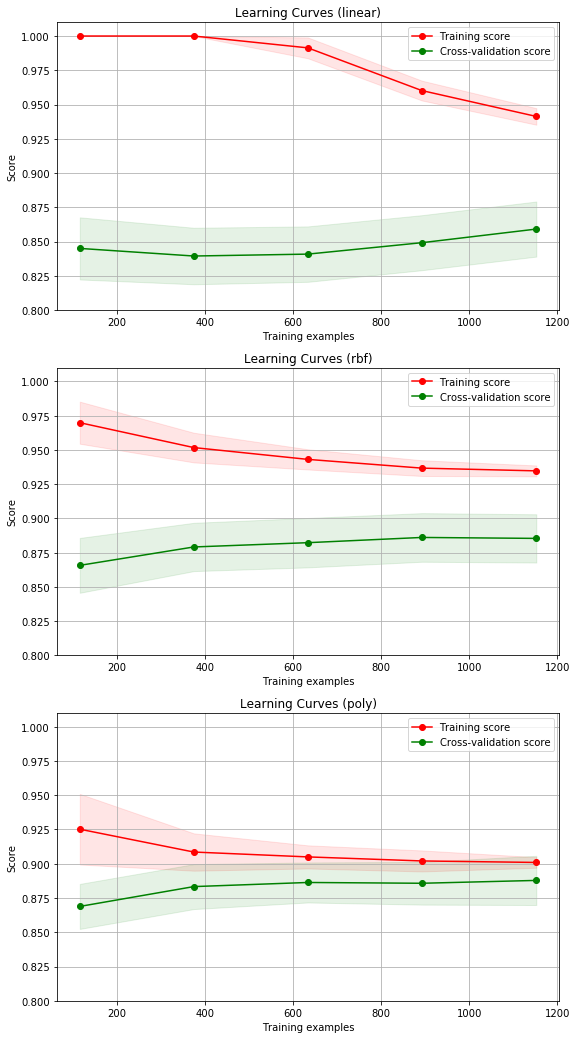

In [15]:
print(__doc__)


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        axes.set_xlabel("Training examples")
        axes.set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
        axes.grid()
        axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes.legend(loc="best")

    return plt

plt.figure(figsize=(9,18))

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)


# estimator = poly_SVC 
# plot_learning_curve(estimator, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
axes = plt.subplot(311)
title = r"Learning Curves (linear)"
plot_learning_curve(lin_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(312)
title = r"Learning Curves (rbf)"
plot_learning_curve(rbf_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(313)
title = r"Learning Curves (poly)"
plot_learning_curve(poly_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)


plt.show()

In [16]:
def val_sc(x):
    score = x.score(te_X, te_Y)
    return score

def tr_sc(x):
    score = x.score(tr_X, tr_Y)
    return score

In [17]:
val_sc = val_sc(rbf_SVC)
val_sc

0.9013888888888889

In [18]:
tr_sc = tr_sc(rbf_SVC)
tr_sc

0.9312090530077427

# Evaluation of model

In [19]:
import landmarks_v2_test as l1 

In [20]:
def get_data():
    return l1.extract_features_labels()

In [21]:
A,b = get_data()

print(A.shape)
print(b.shape)

(970, 68, 2)
(970,)


In [22]:
B = np.array([b, -(b - 1)]).T
def reshapeX(A):
    return A.reshape((A.shape[0], A.shape[1] * A.shape[2]))

def reshapeY(b):
    return list(zip(*b))[0]

te_A = reshapeX(A)
te_B = reshapeY(B)

[[420  53]
 [ 48 449]]

Confusion Matrix


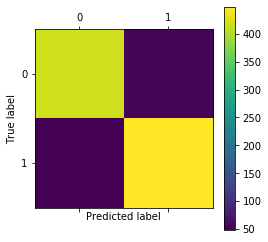

[[0.43298969 0.05463918]
 [0.04948454 0.4628866 ]]

Confusion Matrix(normalised)


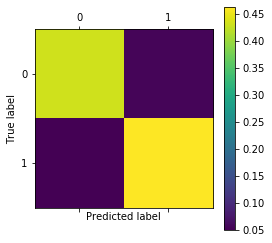

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       473
         1.0       0.89      0.90      0.90       497

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970

Accuracy achieved: 0.8958762886597939 ♡♡♡


In [23]:
op_lin_results = lin_SVC.predict(te_A)

cm = confusion_matrix(te_B, op_lin_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

cm2 = confusion_matrix(te_B, op_lin_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_lin_results))
print('Accuracy achieved:', accuracy_score(te_B, op_lin_results), '\u2661''\u2661''\u2661')

[[426  47]
 [ 53 444]]

Confusion Matrix


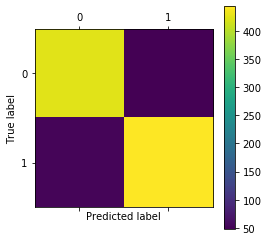

[[0.43917526 0.04845361]
 [0.05463918 0.45773196]]

Confusion Matrix(normalised)


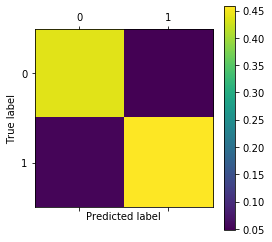

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       473
         1.0       0.90      0.89      0.90       497

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970

Accuracy achieved: 0.8969072164948454 ♡♡♡


In [24]:
op_rbf_results = rbf_SVC.predict(te_A)

cm = confusion_matrix(te_B, op_rbf_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

cm2 = confusion_matrix(te_B, op_rbf_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_rbf_results))
print('Accuracy achieved:', accuracy_score(te_B, op_rbf_results), '\u2661''\u2661''\u2661')

[[428  45]
 [ 47 450]]

Confusion Matrix


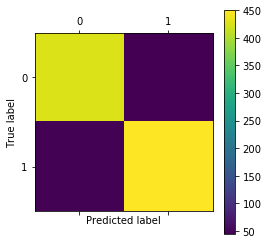

[[0.44123711 0.04639175]
 [0.04845361 0.46391753]]

Confusion Matrix(normalised)


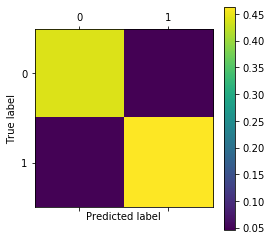

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       473
         1.0       0.91      0.91      0.91       497

    accuracy                           0.91       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.91      0.91      0.91       970

Accuracy achieved: 0.9051546391752577 ♡♡♡


In [25]:
op_p_results = poly_SVC.predict(te_A)

cm = confusion_matrix(te_B, op_p_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

cm2 = confusion_matrix(te_B, op_p_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_p_results))
print('Accuracy achieved:', accuracy_score(te_B, op_p_results), '\u2661''\u2661''\u2661')

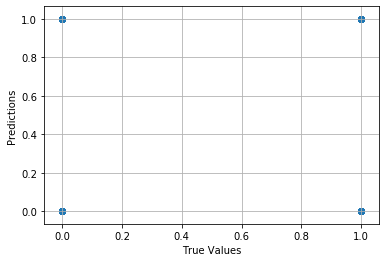

In [26]:
# testing observation on scatter plot
plt.scatter(te_B, op_p_results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

In [27]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 4123.674785614014 seconds ---
